# bootstrapping
from https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60

## standard error of sample mean
verify that the standard error of the sample mean follows the equation:

sigma(sample mean) = sigma(original distribution) / sqrt(sample size)


original distribution: mu: 0, sigma: 1.0


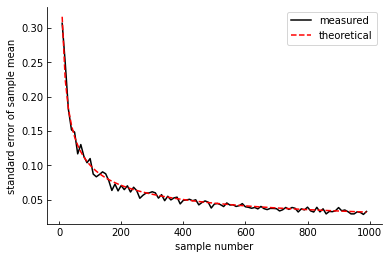

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from pyplot_tools import format_figure

# define the normal distribution
mu, sigma = 0, 1.
print(f"original distribution: mu: {mu}, sigma: {sigma}")

# sample number: 10, 20, 30, ..., 1000
sample_number_list = np.arange(10, 1000, 10)
stdev_of_sample_mean_list = []

for sample_number in sample_number_list:
    # do 100 trials of taking sample_number of samples from the distribution
    trials = 100
    mean_list = []
    for i in range(trials):
        sample = np.random.normal(mu, sigma, sample_number)
        mean_list.append(np.mean(sample))
    stdev_of_sample_mean_list.append(np.std(mean_list))


plt.plot(sample_number_list, stdev_of_sample_mean_list, 'k', label="measured")
plt.plot(sample_number_list, sigma / np.sqrt(sample_number_list), 'r--', label="theoretical")
plt.xlabel("sample number")
plt.ylabel("standard error of sample mean")
plt.legend()
format_figure(plt.gca())
plt.show()

i.e. more samples means more accurate estimates of the mean, though with diminishing returns. Kind of neat how well it fits the theoretical line!

## bootstrapping
guess the "quality" (standard error) of a statistic about sampled data

In [20]:
# from https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60
# this is the population, which is supposed to not be measurable (only samples can be taken)
pickups = np.random.randint(0, 500, size=100)
pickups

array([475, 145, 462, 150, 486, 350, 110, 349, 396, 264, 311, 153, 126,
        20, 425, 429, 142,  31, 390, 469, 461, 305, 441,  36, 175, 351,
        64,   5, 279, 394, 162, 212, 499,  80, 392, 110, 425,  24, 296,
        17, 159, 421, 120, 120, 380, 443,  69, 150, 407, 231, 187, 224,
        58, 459, 263, 223, 418, 245, 145, 133,   2, 104, 225,  67, 491,
       139, 348, 155, 248, 104,  89, 351, 305,  57, 120, 103, 429, 462,
       365,  92, 307, 244, 494, 480, 378, 404, 145, 113,  85, 299, 440,
       413, 292, 121, 458, 153, 424, 282, 408, 364])

In [22]:
# calculate mean and stdev of the population (which are not supposed to be measurable)
population_mean = np.mean(pickups)
population_stdev = np.std(pickups)
print(f"population mean: {population_mean}, population stdev: {population_stdev}")

population mean: 258.26, population stdev: 149.84489447425295


In [27]:
# create a sample (this is what is supposed to be known)
sample_size = 30
sample = np.random.choice(pickups, size=sample_size)
sample

array([103, 282, 153,  17, 351, 299, 378, 245, 425, 120, 126, 311,  58,
       133, 380, 469, 392, 390, 480, 133,  92, 462, 390, 429, 110, 264,
       223,  17, 311,  58])

In [29]:
sample_mean = np.mean(sample)
sample_stdev = np.std(sample)
print(f"sample mean: {sample_mean}, sample stdev: {sample_stdev}")

sample mean: 253.36666666666667, sample stdev: 146.09802264993945


In [31]:
# estimated standard error of sample mean
sample_stdev / np.sqrt(sample_size)

26.673727537424174

In [33]:
# theoretical standard error of sample mean
population_stdev / np.sqrt(sample_size)

27.35780961017652

In [34]:
sample_bootstrapped = []
for _ in range(100000):
    sample = np.random.choice(pickups, size=sample_size)
    sample_bootstrapped.append(np.mean(sample))

In [36]:
simulated_mean = np.mean(sample_bootstrapped)
simulated_stdev = np.std(sample_bootstrapped)
print(f"simulated mean: {simulated_mean}, simulated stdev: {simulated_stdev}")

simulated mean: 258.20292166666667, simulated stdev: 27.35909342242899


(array([3.1000e+01, 6.0400e+02, 4.6370e+03, 1.6655e+04, 3.0839e+04,
        2.9261e+04, 1.4077e+04, 3.4770e+03, 3.9400e+02, 2.5000e+01]),
 array([144.13333333, 167.33666667, 190.54      , 213.74333333,
        236.94666667, 260.15      , 283.35333333, 306.55666667,
        329.76      , 352.96333333, 376.16666667]),
 <BarContainer object of 10 artists>)

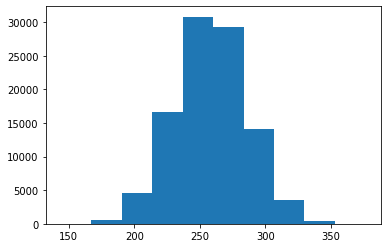

In [37]:
plt.hist(sample_bootstrapped)

In [44]:
print(f"population mean\t{population_mean}\nsample mean\t{sample_mean}\nbootstrap mean\t{simulated_mean}\n")
print(f"population stdev\t{population_stdev / np.sqrt(sample_size)}\nsample stdev\t{sample_stdev / np.sqrt(sample_size)}\nbootstrap stdev\t{simulated_stdev}")

population mean	258.26
sample mean	253.36666666666667
bootstrap mean	258.20292166666667

population stdev	27.35780961017652
sample stdev	26.673727537424174
bootstrap stdev	27.35909342242899


boostrapping gets us much much closer to the population values!!

## EDF, PDF, CDF
Empirical Distribution Function: discrete distribution that is created from sampled data

Cumulative Distribution Function $F$: CDF of a distribution function of a random variable X is the probability that a random variable X is less than or equal to a given value.

Then, the population mean (or expected value) of $X$ is a statistical functional...
$$
E(X) = \int x dF(x) = \int x p(x) dx
$$

where $p$ is the PDF.

The towardsdatascience article goes on after this to talk about plug-in principle and whatnot, but it's beyond me for now...